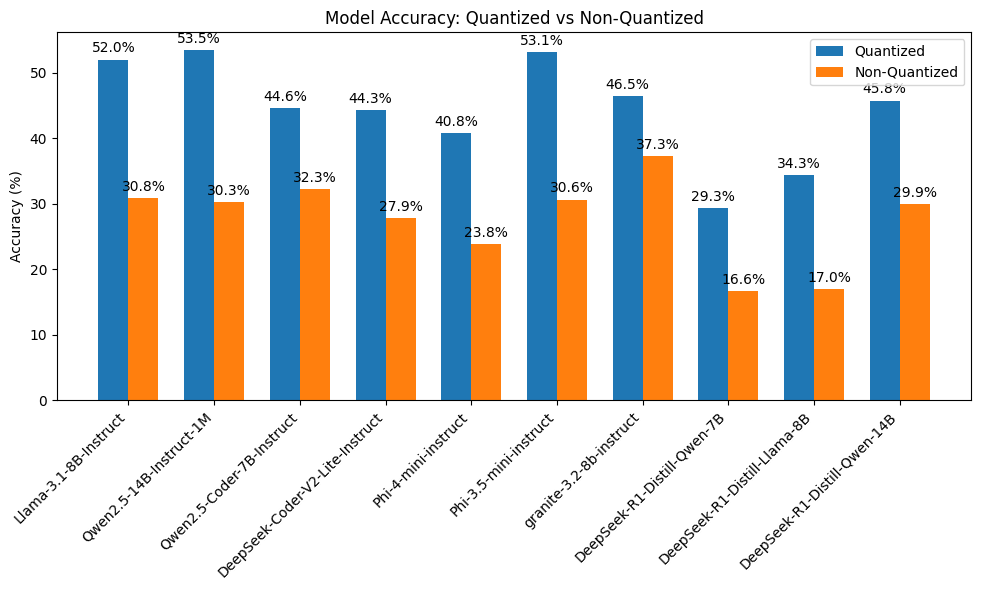

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load your data (replace with your actual file path)
with open('statement_predictions.json', 'r') as f:
    data = json.load(f)

# Prepare data for plotting
models = []
quantized_yes_acc = []
quantized_no_acc = []

for model in data:
    models.append(model)
    quantized_yes_acc.append(data[model]["quantized_yes"]["pt4"]["python"]["statement"]["shot3"]["CoT_yes"]["Incontext_same"]["overall_accuracy"])
    quantized_no_acc.append(data[model]["quantized_no"]["pt4"]["python"]["statement"]["shot3"]["CoT_yes"]["Incontext_same"]["overall_accuracy"])

# Convert to percentages
quantized_yes_acc = [x * 100 for x in quantized_yes_acc]
quantized_no_acc = [x * 100 for x in quantized_no_acc]

# Create the plot
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, quantized_yes_acc, width, label='Quantized', color='#1f77b4')
rects2 = ax.bar(x + width/2, quantized_no_acc, width, label='Non-Quantized', color='#ff7f0e')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy: Quantized vs Non-Quantized')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

/home/XXX/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/XXX/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/XXX/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/XXX/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated 

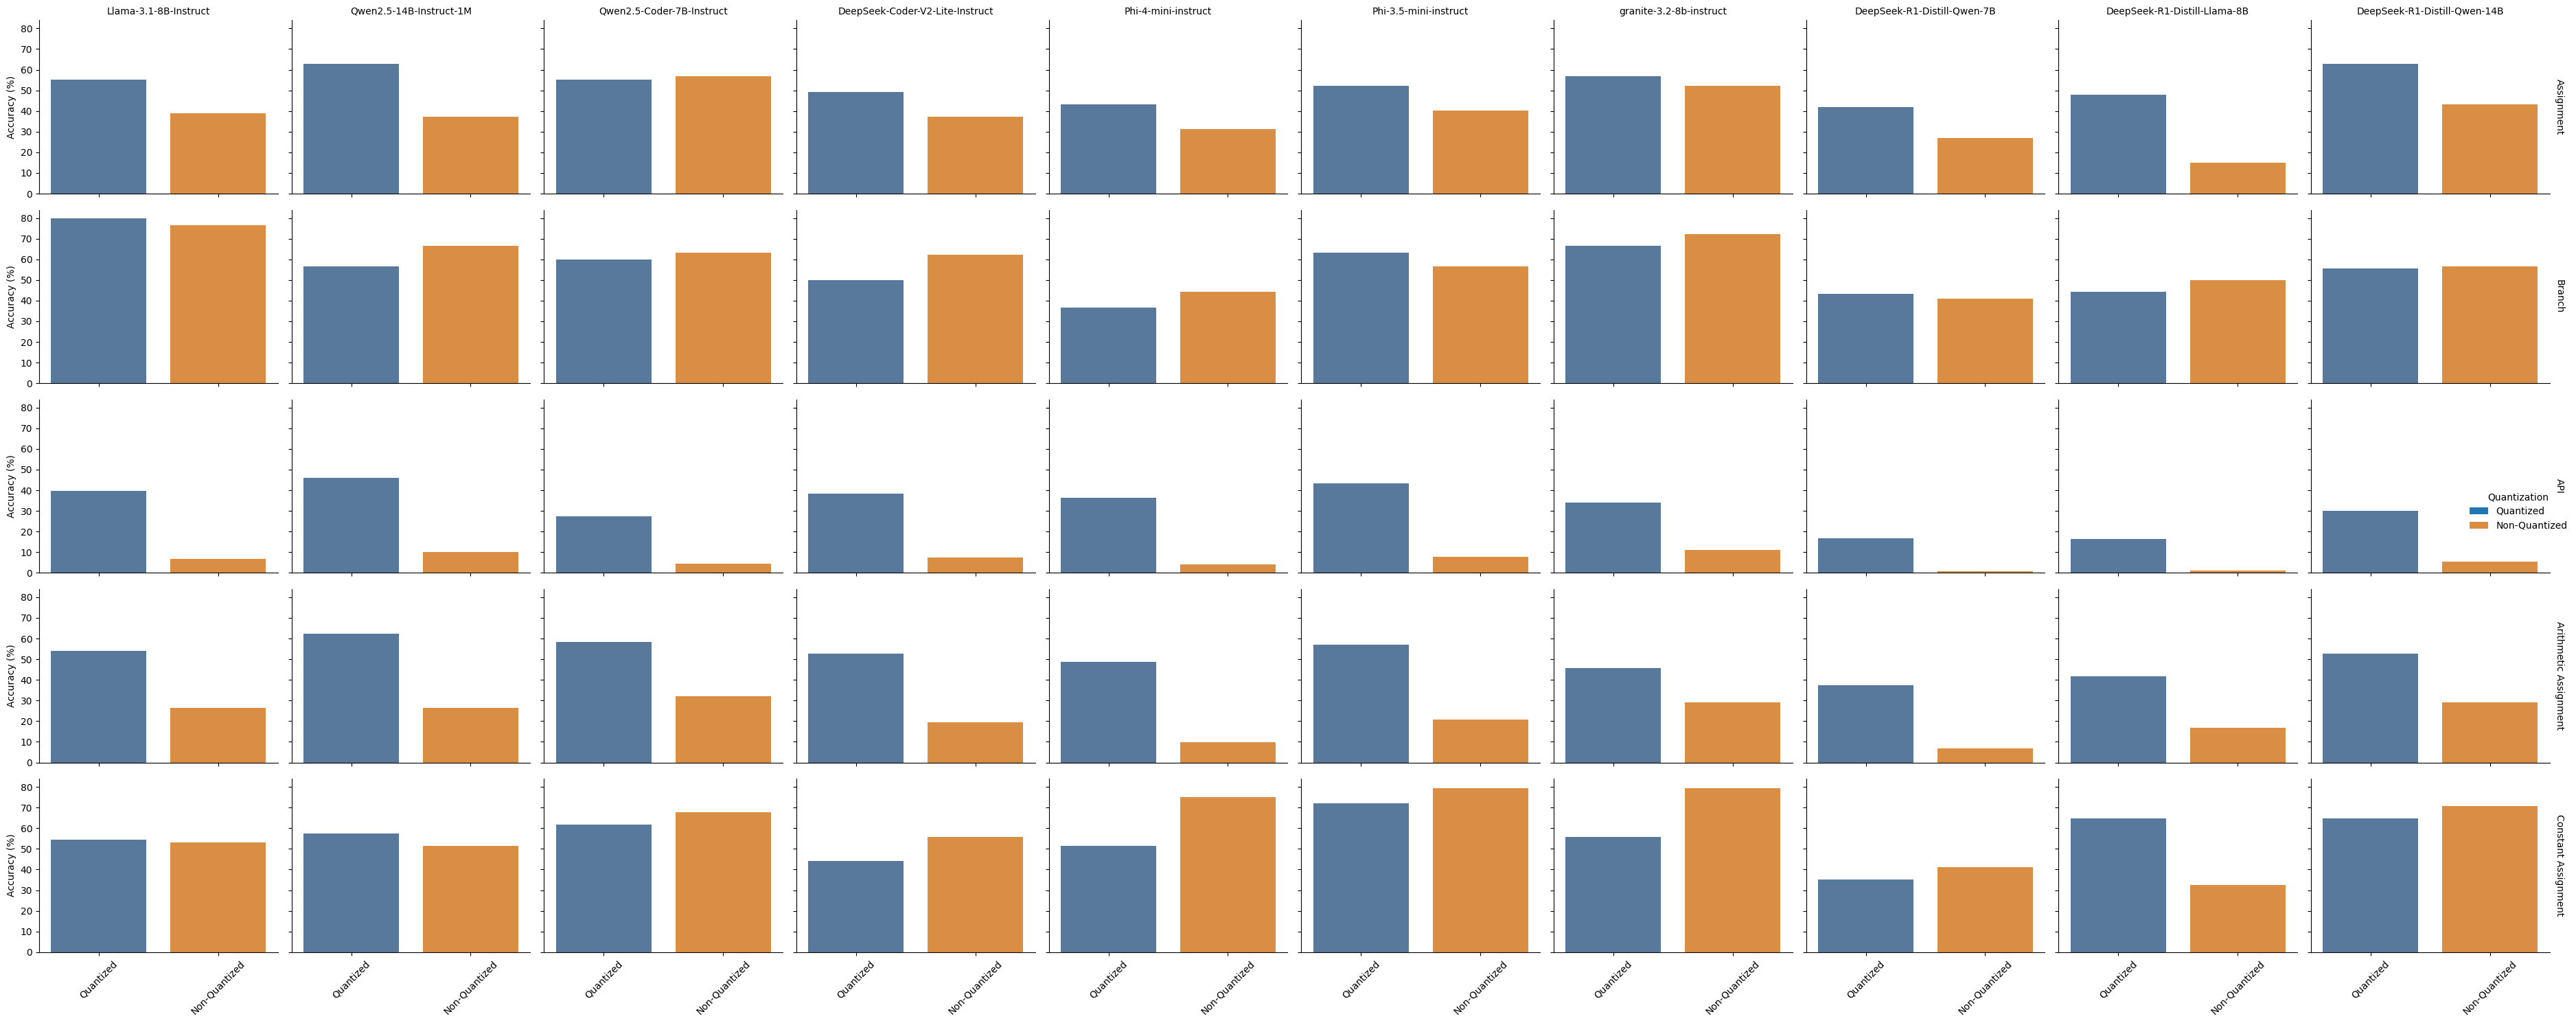

In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load data
with open('statement_predictions.json', 'r') as f:
    data = json.load(f)

# Prepare DataFrame
rows = []
for model in data:
    for quant in ['quantized_yes', 'quantized_no']:
        for type_name, acc in data[model][quant]['pt4']['python']['statement']['shot3']['CoT_yes']['Incontext_same']['type_accuracy'].items():
            rows.append({
                'Model': model,
                'Quantization': 'Quantized' if quant == 'quantized_yes' else 'Non-Quantized',
                'Type': type_name,
                'Accuracy': acc * 100,
                'Count': data[model][quant]['pt4']['python']['statement']['shot3']['CoT_yes']['Incontext_same']['type_counts'][type_name]
            })
df = pd.DataFrame(rows)

# Create facetted plot
g = sns.FacetGrid(df, col='Model', row='Type', hue='Quantization',
                  height=3, aspect=1.2, sharey=True, margin_titles=True)
g.map(sns.barplot, 'Quantization', 'Accuracy', order=['Quantized', 'Non-Quantized'],
      palette=['#4e79a7', '#f28e2b'])
g.set_axis_labels('', 'Accuracy (%)')
g.set_titles(col_template='{col_name}', row_template='{row_name}')
g.add_legend(title='Quantization')

# Rotate x-axis labels and adjust layout
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()